Data exploration and pre-processing

Import libraries. (DELETE THIS NOTE LATER: Left various libraries used in exercises if will be needed later.)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math #For the log10 function
import seaborn as sns
#import sklearn as sk
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.dummy import DummyRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import Lasso
#from sklearn.utils import resample

Import the train and test .csv files into Pandas DataFrame.

In [41]:
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")
x_train = data_train.drop(columns=["Id", "pSat_Pa"], axis=1)
y_train = data_train[["Id", "pSat_Pa"]]
y_train.loc[:,"target"] = y_train["pSat_Pa"].apply(lambda y: math.log10(y)) # column name must be "target"
target = y_train.loc[:,"target"]
x_test = data_test.drop(columns=["Id"], axis=1) # OR THIS ONE NOT NEEDED?
#print(data_train.columns)
#print(data_test.columns)
#print(data_train.describe())
#print(data_test.describe())
#print(x_train)
#print(y_train)
#print(x_test)
#print(target)

0        5.807518
1        4.012656
2        4.130899
3        2.383151
4        2.498802
           ...   
27142   -3.584787
27143   -4.551207
27144   -6.746709
27145   -4.456638
27146   -4.819446
Name: target, Length: 27147, dtype: float64


Notes:
- Train dataset includes 27,147 rows and 27 columns, including pSat_Pa as the last column.
- Test dataset includes 4490 rows and 26 columns, excluding pSat_Pa.

Plot each variable against the target variable.

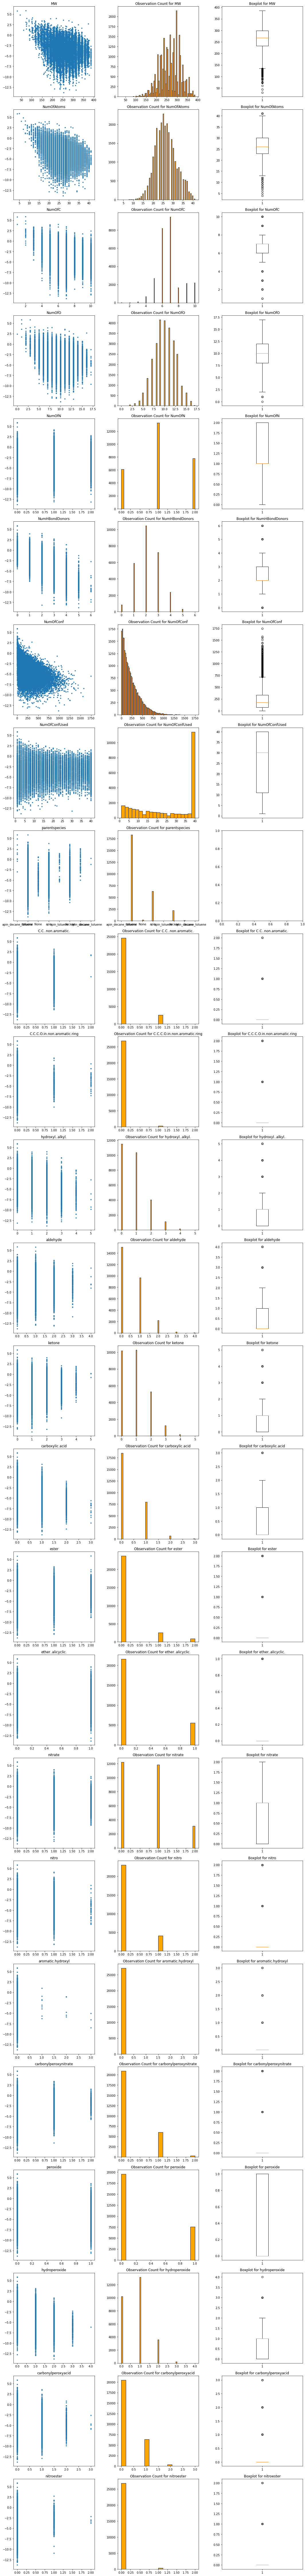

In [73]:
n = x_train.shape[1]

fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

# Plot each column
for i in range(n):
    #Scatter plot
    axes[i,0].scatter(x_train.iloc[:, i], target, label=x_train.columns[i], marker='.')
    axes[i,0].set_title(x_train.columns[i])

    # Add a histogram for the count of observations
    axes[i,1].hist(x_train.iloc[:,i], bins="auto", color='orange', edgecolor="black")
    axes[i,1].set_title(f'Observation Count for {x_train.columns[i]}')

    #Add a boxplot for a variable
    if x_train.columns[i] != "parentspecies":
        axes[i, 2].boxplot(x_train.iloc[:, i])
        axes[i, 2].set_title(f'Boxplot for {x_train.columns[i]}')
    else:
        continue

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Q&A
- Should we include the "Id" column in both x_train and y_train DataFrames?

Key points:
- All of the training data is valid; that is, there are no missing or mismatched values for any of the variables. This observation is based on the variable-specific graphs available in Kaggle.
